# Accuracy

## Confusion Matrix

|Reality/Prediction |0|1|
|----|----|----|
|0|TN|FP|
|1|FN|TP|

矩阵的最上一行代表预测值，最左列为真实值；

1. 0 - Negative、1 - Positive；

2. TN、FP、FN、TP：表示预测结果的样本数量；

3. TN（True Negative）：实际值为 Negative，预测值为 Negative，预测 negative 正确；

4. FP（False Positive）：实际值为 Negative，预测值为 Positive，预测 Positive 错误；

5. FN（False Negative）：实际值为 Positive，预测值为 Negative，预测 Negative 错误；

6. TP（True Positive）：实际值为 Positive，预测值为 Positive，预测 Positive 正确；

## Precison and Recall

|Reality/Prediction |0|1|
|----|----|----|
|0|9978<br>TN|12<br>FP|
|1|2<br>FN|8<br>TP|

###### 1）精准率（precision）

精准率：预测所关注的事件的结果中（共预测了 20 次），预测正确的概率（8 次正确，12 次错误）；
精准率 = TP / (TP + FP) = 8 / (8 + 12) = 40%
含义：每做 100 次患病的预测，平均会有 40 次是正确的；

###### 2）召回率（recall）

召回率：对所有所关注的类型（癌症患者，共 10 个），将其预测出的概率（预测出 8 个）；
召回率 = TP / (TP + FN) = 8 / (8 + 2) = 80%
解释：每当有 100 个癌症患者，通过该预测系统，能够成功的找出 80 个癌症患者；

###### 3）精准率和召回率比准确率好的原因

结合实际的业务要求：目的是要根据体检信息，更准确和高效的找出癌症病人；准确率并不能反映系统是否找出了全部的癌症病人，或者找出了多大比例的癌症病人；而精准率和召回率更能直接的反应系统能够找出癌症病人的能力；

## Instance

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

In [3]:
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [6]:
log_reg.score(X_test, y_test)

0.9755555555555555

In [7]:
y_log_predict = log_reg.predict(X_test)

In [8]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

In [9]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_test, y_log_predict), FP(y_test, y_log_predict)],
        [FN(y_test, y_log_predict), TP(y_test, y_log_predict)]
    ])

In [10]:
confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [11]:
def precision_score(y_true, y_predict):
    tp = TP(y_test, y_log_predict)
    fp = FP(y_test, y_log_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0

In [12]:
precision_score(y_test, y_log_predict)

0.9473684210526315

In [13]:
def recall_score(y_true, y_predict):
    tp = TP(y_test, y_log_predict)
    fn = FN(y_test, y_log_predict)
    # try...except：异常检测；
        # 没有异常，执行 try 后面的语句；
        # 出现异常，执行 except 后面的语句，
    try:
        return tp / (tp + fn)
    except:
        return 0.0

In [14]:
recall_score(y_test, y_log_predict)

0.8

## Scikit—learn.metrics

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [16]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [17]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

## F1 Score
+ F1 Score：兼顾降准了和召回率，当急需要考虑精准率又需要考虑召回率，可查看模型的 F1 Score，根据 F1 Score 的大小判断模型的优劣；
+ F1 = 2 * Precision * recall / (precision + recall)，是二者的调和平均值；
+ $F1 = \frac{2·precision·recall}{precision + recall}$

1. F1 是 precision 和 recall 的调和平均值；
2. 调和平均值：如果 1/a = (1/b + 1/c) / 2，则称 a 是 b 和 c 的调和平均值；
3. 调和平均值特点：|b - c| 越大，a 越小；当 b - c = 0 时，a = b = c，a 达到最大值；
4. 具体到精准率和召回率，只有当二者大小均衡时，F1 指标才高，

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.8674698795180723

## Threshold

+ LogisticRegression() 类中的 predict() 方法中，默认阈值 threshold 为 0，再根据 decision_function() 方法计算的待预测样本的 score 值进行对比分类：score < 0 分类结果为 0，score > 0 分类结果为 1；
+ log_reg.decision_function(X_test)：计算所有待预测样本的 score 值，以向量的数量类型返回结果；


In [19]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
y_predict_1 = log_reg.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict_1)

array([[403,   2],
       [  9,  36]])

In [23]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict_1)

0.9473684210526315

In [24]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict_1)

0.8

In [25]:
decision_score = log_reg.decision_function(X_test)
y_predict_2 = np.array(decision_score >= 5, dtype='int')

confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]])

In [26]:
precision_score(y_test, y_predict_2)

0.96

In [27]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [28]:
decision_score = log_reg.decision_function(X_test)
y_predict_3 = np.array(decision_score >= -5, dtype='int')

confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]])

In [29]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [30]:
recall_score(y_test, y_predict_3)

0.8888888888888888

## P-R Curve

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [35]:
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

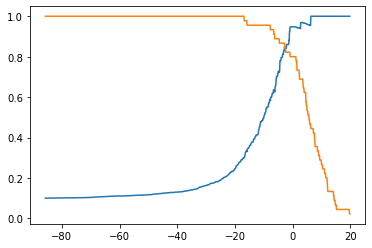

In [36]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

###### P-R Curve

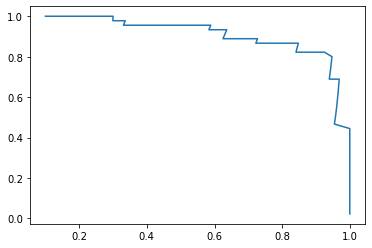

In [37]:
plt.plot(precisions, recalls)
plt.show()

In [38]:
from sklearn.metrics import precision_recall_curve

In [39]:
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [40]:
precisions.shape

(151,)

In [41]:
recalls.shape

(151,)

In [42]:
thresholds.shape

(150,)

1. 现象：thresholds 中的元素个数，比 precisions 和recalls 中的元素个数少 1 个;
2. 原因：当 precision = 1、recall = 0 时，不存在 threshold；

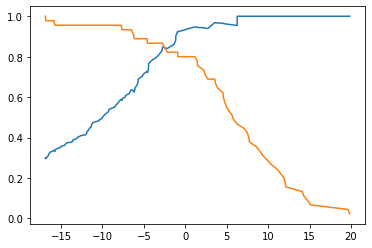

In [43]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

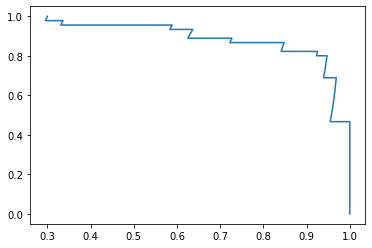

In [44]:
plt.plot(precisions, recalls)
plt.show()

1. 外层曲线对应的模型更优；或者称与坐标轴一起包围的面积越大者越优。
2. P - R 曲线也可以作为选择算法、模型、超参数的指标；但一般不适用此曲线，而是使用 ROC 曲线；

## ROC Curve

|Reality/Prediction |0|1|
|----|----|----|
|0|9978<br>TN|12<br>FP|
|1|2<br>FN|8<br>TP|

$$FPR = \frac{FP}{TN+FP}$$

$$TPR = \frac{TP}{TP+FN}$$

1. TPR（True Positive Rate）：真正率；被预测为正的正样本结果数 / 正样本实际数：TPR = TP /（TP + FN）；
2. TNR（True Negative Rate）：真负率；被预测为负的负样本结果数 / 负样本实际数：TNR = TN /（TN + FP） ；
3. FPR（False Positive Rate）：假正率；被预测为正的负样本结果数 /负样本实际数：FPR = FP /（TN + FP） ；
4. FNR（False Negative Rate）：假负率；被预测为负的正样本结果数 / 正样本实际数：FNR = FN /（TP + FN） ；

###### 关系：
1. 随着阈值 threshold 的增大，FPR 和 TPR 都逐渐减小；
2. FPR 和 TPR 称正相关关系，FPR 越高，TPR 相应的也越高；

In [45]:
import numpy as np
from sklearn import datasets

In [46]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
from playML.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [50]:
for threshold in thresholds:
    # dtype='int'：将数据类型从 bool 型转为 int 型；
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

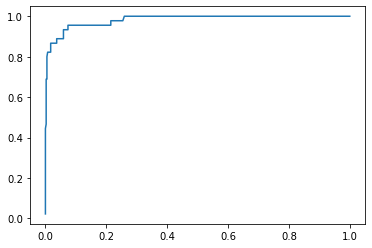

In [51]:
plt.plot(fprs, tprs)
plt.show()

###### 分析：

1. ROC 曲线下方与图形边界围成的面积，作为衡量模型优劣的标准，面积越大，模型越优；
2. 可以是同样算法不同超参数所得的不同模型，也可以是不同算法所得的不同模型；

In [52]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9823319615912208

## Confusion Matrix in Muti-class Classification

In [54]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [56]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0

+ 多分类问题，精准率、召回率、阈值的计算，需要修改 average 参数：average = 'micro'

In [57]:
y_predict = log_reg.predict(X_test)

In [58]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average='micro')

0.9485396383866481

In [59]:
cfm = confusion_matrix(y_test, y_predict)

In [60]:
cfm

array([[149,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   0,   2,   0,   2,   0],
       [  0,   1, 139,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 138,   0,   6,   0,   0,   2,   1],
       [  0,   1,   0,   0, 124,   0,   7,   1,   1,   0],
       [  0,   1,   1,   0,   0, 136,   0,   1,   0,   2],
       [  1,   1,   0,   0,   1,   0, 141,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 143,   2,   1],
       [  0,   9,   4,   0,   0,   4,   0,   1, 113,   2],
       [  1,   0,   0,   4,   0,   3,   0,   2,   5, 144]])

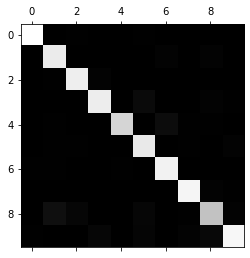

In [61]:
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [62]:
row_sums = np.sum(cfm, axis=1)

In [63]:
err_matrix = cfm / row_sums

In [64]:
np.fill_diagonal(err_matrix, 0)
# np.fill_digonal(矩阵， m)：将矩阵对角线的数据全部改为 m；

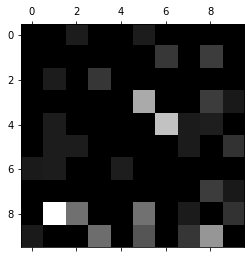

In [65]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()